In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", 
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
model_1 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') 
])
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.9409 - accuracy: 0.5893 - val_loss: 0.5097 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 1984s 43s/step - loss: 0.4858 - accuracy: 0.7853 - val_loss: 0.3962 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4199 - accuracy: 0.8107 - val_loss: 0.3592 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.3533 - accuracy: 0.8620 - val_loss: 0.3690 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 55s 1s/step - loss: 0.2559 - accuracy: 0.9060 - val_loss: 0.4065 - val_accuracy: 0.8180


<AxesSubplot:>

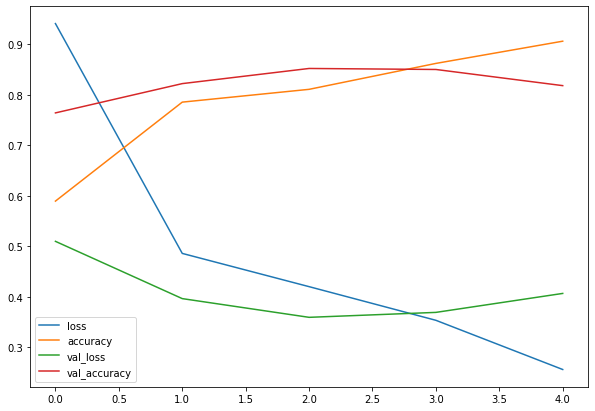

In [21]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [22]:
# max pooling 
model_5 = Sequential([
    Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), 
    MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid') 
])
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 539ms/step - loss: 0.6249 - accuracy: 0.6560 - val_loss: 0.5159 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4932 - accuracy: 0.7620 - val_loss: 0.4150 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4316 - accuracy: 0.8073 - val_loss: 0.3726 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4084 - accuracy: 0.8193 - val_loss: 0.3779 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.3943 - accuracy: 0.8287 - val_loss: 0.3260 - val_accuracy: 0.8580


In [ ]:
model_5.summary()

<AxesSubplot:>

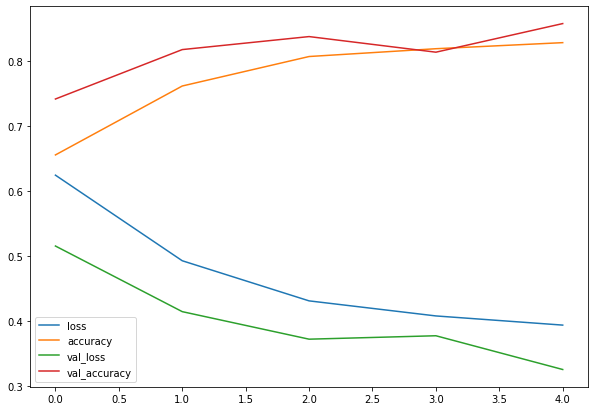

In [24]:
pd.DataFrame(history_5.history).plot(figsize=(10, 7))

In [28]:
# try data augmentation
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [30]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

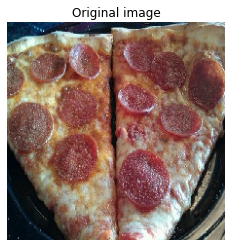

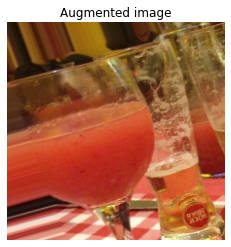

In [36]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [37]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 839ms/step - loss: 0.9666 - accuracy: 0.5247 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 37s 791ms/step - loss: 0.6942 - accuracy: 0.5180 - val_loss: 0.6768 - val_accuracy: 0.6060
Epoch 3/5
47/47 [==============================] - 35s 739ms/step - loss: 0.7015 - accuracy: 0.5153 - val_loss: 0.6886 - val_accuracy: 0.5980
Epoch 4/5
47/47 [==============================] - 35s 752ms/step - loss: 0.6877 - accuracy: 0.5560 - val_loss: 0.6624 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 38s 807ms/step - loss: 0.6853 - accuracy: 0.5927 - val_loss: 0.6380 - val_accuracy: 0.7460


In [38]:
# add shuffling 
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [39]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 884ms/step - loss: 0.6385 - accuracy: 0.6173 - val_loss: 0.5024 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 83s 2s/step - loss: 0.5260 - accuracy: 0.7460 - val_loss: 0.4327 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 40s 845ms/step - loss: 0.5000 - accuracy: 0.7607 - val_loss: 0.3934 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 36s 765ms/step - loss: 0.4613 - accuracy: 0.7887 - val_loss: 0.3400 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 36s 762ms/step - loss: 0.4674 - accuracy: 0.7967 - val_loss: 0.3373 - val_accuracy: 0.8580
